## Bank Marketing  Case Study: Numerical attributes check
The head of Marketing wants to know which customers have the highest propensity for buying a Certificate of Deposit (CD) from the institution. The goal of this project is to check errors in numerical variables and correct them. 


- Use proc univariate to examine errors in numerical variables. 
- Use binning to create derived variables.
- list the highest and lowest values for a numerical variable by percentage.


### Examine the list of numerical attributes 

Use proc means to list the numerical attributes and their descriptive statistics. 


In [40]:
libname mylib '/folders/myfolders/Assignments';
Title"List of Numerical Attributes";
proc means data = mylib.customer_all n mean nmiss min max std stderr lclm uclmx;
run;

Variable,Label,N,Mean,N Miss,Minimum,Maximum,Std Dev,Std Error,Lower 95%CL for Mean,Upper 95%CL for Mean
customer_id day campaign pdays previous balance AGE,day campaign pdays previous AGE,10578 10578 10578 10578 10578 10578 10558,127278.17 15.4758934 2.4747589 51.9548119 0.8525241 1548.53 41.2641599,0 0 0 0 0 0 20,100103.00 1.0000000 1.0000000 -1.0000000 0 -3058.00 18.0000000,145309.00 31.0000000 50.0000000 854.0000000 275.0000000 81204.00 146.0000000,13660.22 8.4137946 2.6151781 109.3471124 3.4721156 3130.57 12.1483452,132.8176494 0.0818069 0.0254273 1.0631769 0.0337592 30.4383415 0.1182296,127017.82 15.3155364 2.4249167 49.8707849 0.7863497 1488.86 41.0324075,127538.52 15.6362504 2.5246011 54.0388388 0.9186985 1608.19 41.4959122


<font color=Magenta> Interpret: </font> 
- Observe the range of values for pdays. go to https://archive.ics.uci.edu/ml/datasets/bank+marketing and check what pdays stands for.  what does -1 means? 
- Examine the range of values for day. what does this variable refer to? 
- Examine the column N Miss for the variable "age". are there missing values? how many ? 

###  Examine the variable "age" 
   #### Use PROC UNIVARIATE to examine the numeric variable "age" by showing tabular and graphical information. 


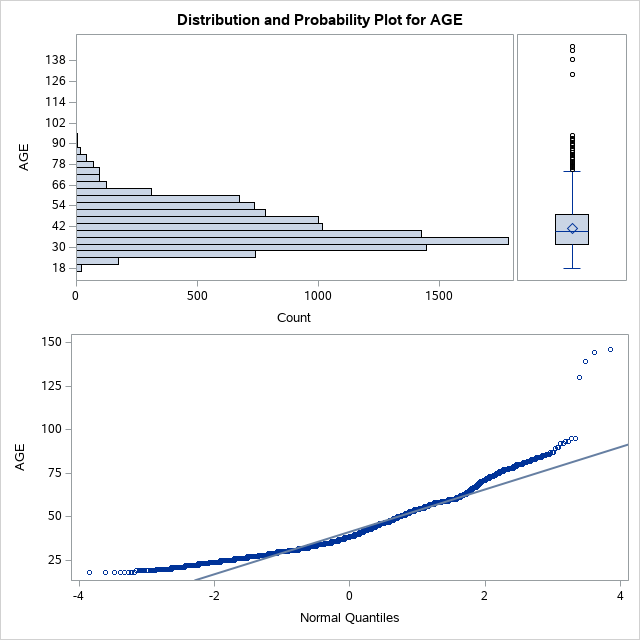
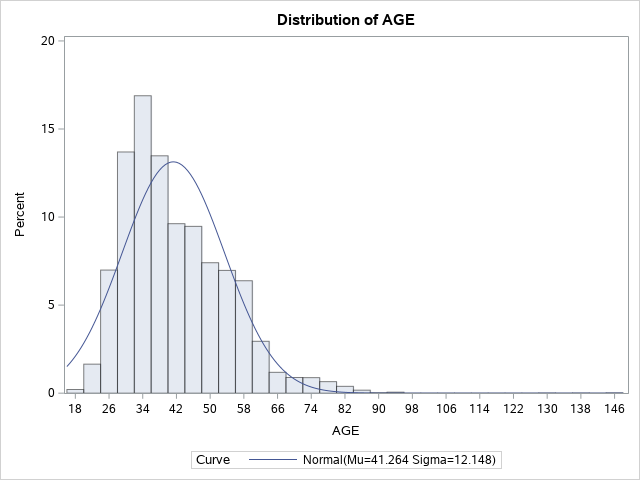

In [41]:
Title"Numerical Variable age";
proc univariate data=mylib.customer_all plot;
var age;
histogram/normal;
run;


#### Write a code to output the customer_id whose age is missing. Use the function missing within if statements


In [42]:
Title"Missing Customer Id Data";
data customerinfo;
file print;
set mylib.customer_all;
if missing (age) then put customer_id = ;

run;


#### Apply imputation to replace missing values for age with the mean age. 
Name the imputed dataset as customer_all_Imputed. 
     
For reference, use PROC STDIZE to replace missing values with mean.   
ref: https://blogs.sas.com/content/iml/2017/12/04/mean-imputation-sas.html


In [43]:
data cusotmerinfo;
set mylib.customer_all;
proc stdize data = customerinfo out= customer_all_Imputed
oprefix = Orig_ reponly
method = Mean;
var Age;
run;
Title"Replacing with mean age";
proc print data = customer_all_Imputed (obs=30);
var Customer_id Orig_Age Age;
run;

Obs,customer_id,Orig_AGE,AGE
1,100103,33,33
2,100106,35,35
3,100118,57,57
4,100119,60,60
5,100121,28,28
6,100126,44,44
7,100130,36,36
8,100141,44,44
9,100161,32,32
10,100168,59,59


#### Use proc means to check the list of numerical attributes in customer_all_Imputed 
make sure there is no missing value for the variable age. 

In [44]:
Title" List of Numerical Attributes in Customer_all_Imputed";
proc means data =customer_all_imputed n mean nmiss min max std stderr lclm uclmx;
var customer_id Age;
run;

Variable,Label,N,Mean,N Miss,Minimum,Maximum,Std Dev,Std Error,Lower 95%CL for Mean,Upper 95%CL for Mean
customer_id AGE,AGE,10578 10578,127278.17 41.2641599,0 0,100103.00 18.0000000,145309.00 146.0000000,13660.22 12.1368542,132.8176494 0.1180061,127017.82 41.0328458,127538.52 41.4954740


####  Rename SAS dataset to its original name customer_all. 
- to delete a SAS dataset: http://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001397672.htm
- to rename a SAS dataset: http://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001397454.htm

In [48]:
proc datasets library=work;
change customer_all_imputed=customer_alll;
run;

### Does age have an influence on balance?  
   
You may think to scatter plot age versus balance. Have a look! 
Ref: https://kb.iu.edu/d/bddo

It is hard to have a conclusion! 



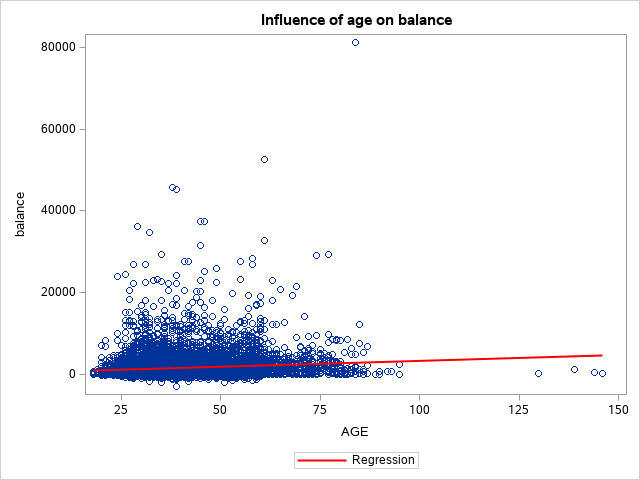

In [49]:
* use sgplot to draw a scatter plot and regression line ; 
title 'Influence of age on balance';
proc sgplot data=mylib.customer_all;
reg x=age y=balance / lineattrs=(color=red thickness=2);
run;

####   Binning  
- discretize the variable age by creating a new cat variable named age_cat: 
        18 <=AGE <=35 for young_adult,  
        36 <=AGE <=55 for middle_age  
        >56 for old.  
- show a simple frequency table for age_cat


In [51]:
data agecat;
set mylib.customer_all;
if 18 le Age le 35 and not missing (age) then age_cat = 'young_adult';
else if 36 le Age le 55 and not missing (age) then age_cat = 'middle_age';
else if Age gt 56 and not missing (age) then age_cat  = 'old';
run;

Title "Frequency table for Age_cat";
proc freq data = agecat;
table Age_cat;
run;

####  Here is the code to create a bar chart of balance by age.  



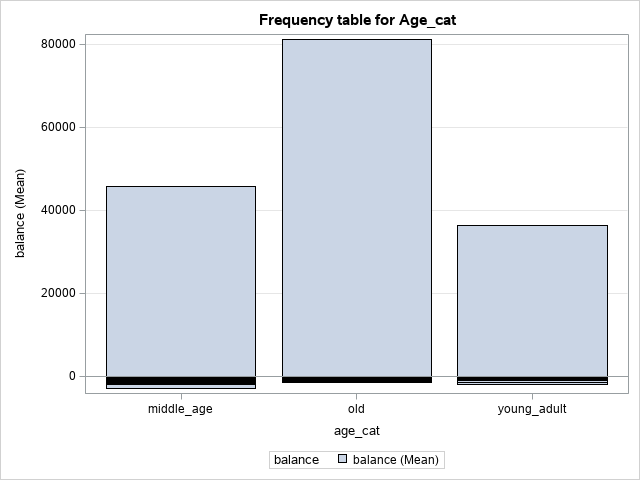

In [53]:
proc sgplot data=agecat;
    vbar age_cat / response=balance group=balance groupdisplay=cluster stat=mean;
    yaxis grid;
run;


### Examine the variable campaign 
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

####  Use proc univariate on campaign. 




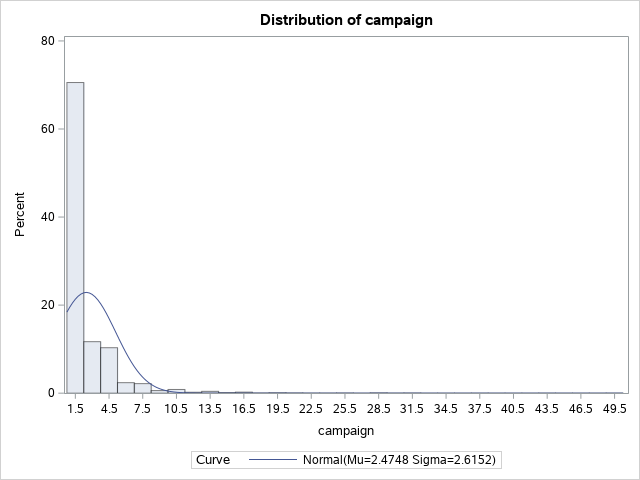

In [54]:
title "Univariate on Campaign";
proc univariate data = mylib.customer_all;
var campaign;
histogram/normal;
run;

####  Based on quantiles table, the variable campaign seems  more categorical in nature than continuous. 
Convert the variable campaign into a categorical variable name "campaign_cat" with ordinal values { 1, 2, 3, >3} 


In [57]:
data campaign_cat;
set mylib.customer_all;
if missing(campaign) then 
Campaign_cat = 'No contacts performed';
else if campaign = 1  then 
Campaign_cat = '1 contact performed';
else if campaign = 2  then 
Campaign_cat = '2 contacts performed';
else if campaign = 3 then 
Campaign_cat = '3 contacts performed';
else if campaign >3 then 
Campaign_cat = 'More than 3 contacts performed';
run;
Title"Campagin Contacts";
Proc print data= campaign_cat (obs=30);
var customer_id age campaign campaign_cat;
run;


Obs,customer_id,AGE,campaign,Campaign_cat
1,100103,33,1,1 contact performed
2,100106,35,1,1 contact performed
3,100118,57,1,1 contact performed
4,100119,60,1,1 contact performed
5,100121,28,1,1 contact performed
6,100126,44,1,1 contact performed
7,100130,36,1,1 contact performed
8,100141,44,1,1 contact performed
9,100161,32,1,1 contact performed
10,100168,59,1,1 contact performed


### Examine the variable "balance"
#### Investigate the distribution of balance.  use proc univariate to get the statistics along a histogram for the variable balance.



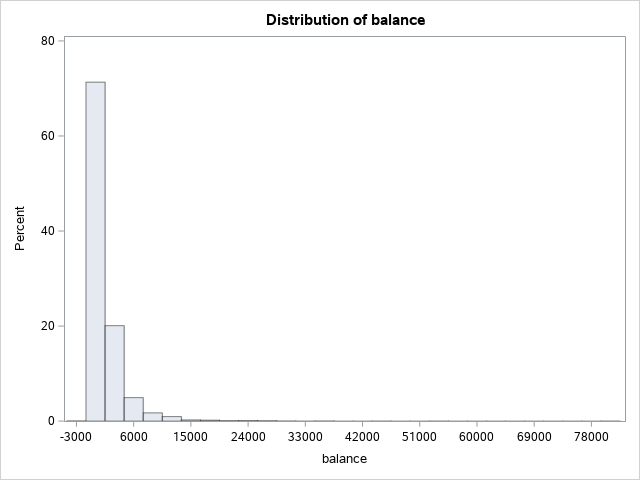

In [58]:
title "Running PROC UNIVARIATE on balance";
proc univariate data=mylib.customer_all noprint;
   id customer_id;
   var balance;
   histogram /;
run;

#### Have a look at those two graphs. both show the balance by customers who did or did not purchase a CD. Which graph is more informative? What conclusion can you formulate based on the graph? 


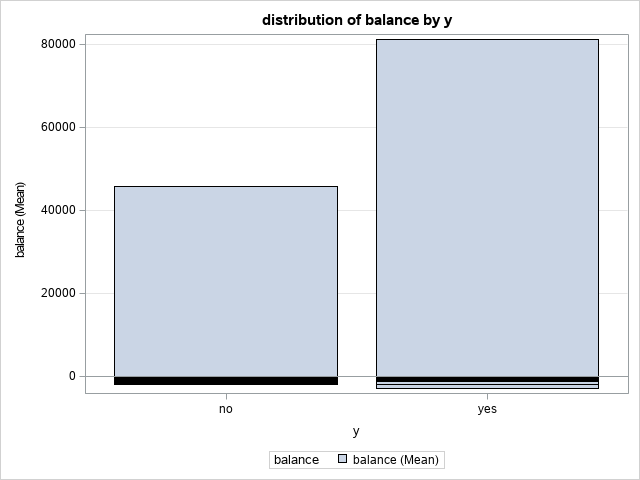
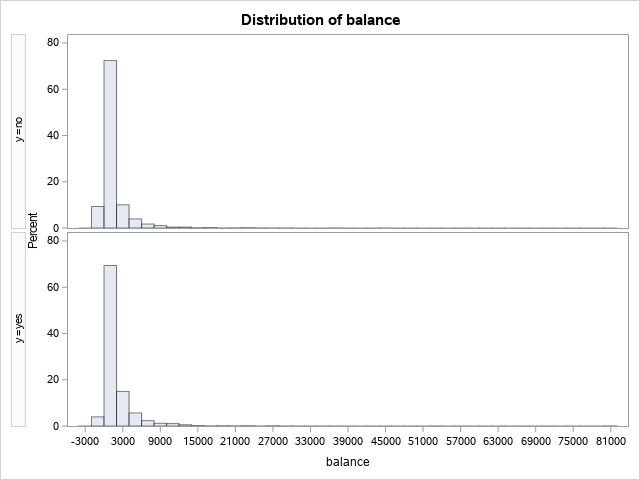

In [35]:

libname mylib '/folders/myfolders/Assignments';

proc sgplot data=mylib.CUSTOMER_ALL;
    vbar y / response=balance group=balance groupdisplay=cluster stat=mean;
    yaxis grid;
run;



title 'distribution of balance by y';
proc univariate data=mylib.customer_all noprint; 
class y; 
histogram balance; 
run;


### Examine  the variable pdays 
pdays: number of days that passed by after the client was last contacted from a previous campaign 
 (numeric; -1 means client was not previously contacted)
 
#### Use proc univariate on the variable pdays. 



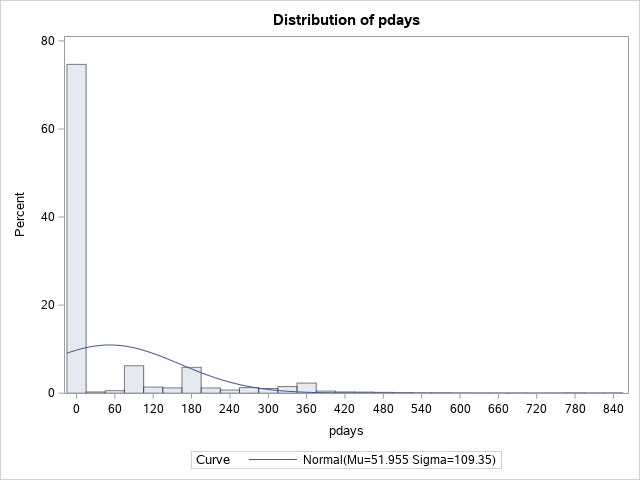

In [59]:
Title "Proc Univariate on the varibale pdays";
Proc univariate data = mylib.customer_all;
var pdays;
id customer_ID;
output out =c_before;
histogram /normal;
run;


#### Creating a derived variable
By checking the quantiles table in the proc univariate output, clearly it is better to create a new categorical variable named "contacted_before" that takes the value  'yes' if the customer has been contacted before and 'no' if the customer was not contacted before in a previous campaign (pdays=-1) 


In [61]:
data contacted_before;
set mylib.customer_all;
if pdays> 1 and not missing(pdays) then
contacted_before= "YES";
if pdays= -1 and not missing(pdays) then 
contacted_before= "NO";
run;
Title"New Variable";
proc print data =contacted_before (obs=30);
id customer_id;
var pdays contacted_before;
run;


customer_id,pdays,contacted_before
100103,-1,NO
100106,-1,NO
100118,-1,NO
100119,-1,NO
100121,-1,NO
100126,-1,NO
100130,-1,NO
100141,-1,NO
100161,-1,NO
100168,-1,NO


#### Printing the first 5 observations where pdays>0

In [68]:
data contacted_before_first;
set mylib.customer_all;
if pdays> 0 and not missing(pdays) then
contacted_before= "YES";
Title"First 5 observation where pdays is greater than 0";
proc print data =contacted_before_first (obs=5);
id customer_id;
var pdays contacted_before;
run;

customer_id,pdays,contacted_before
100103,-1,
100106,-1,
100118,-1,
100119,-1,
100121,-1,


#### Dropping the column pdays 

In [70]:
Title" Table without pdays";
proc print data=Contacted_before (drop=pdays obs=30); 
id customer_id;
run; 

customer_id,contact,day,month,campaign,previous,poutcome,y,default,balance,housing,loan,Education,AGE,marital,JOB,contacted_before
100103,unknown,5,may,1,0,unknown,no,no,2,yes,yes,secondary,33,married,entrepreneur,NO
100106,unknown,5,may,1,0,unknown,no,no,231,yes,no,tertiary,35,married,management,NO
100118,unknown,5,may,1,0,unknown,no,no,52,yes,no,primary,57,married,blue-collar,NO
100119,unknown,5,may,1,0,unknown,no,no,60,yes,no,primary,60,married,retired,NO
100121,unknown,5,may,1,0,unknown,no,no,723,yes,yes,secondary,28,married,blue-collar,NO
100126,unknown,5,may,1,0,unknown,no,no,-372,yes,no,secondary,44,married,admin.,NO
100130,unknown,5,may,1,0,unknown,no,no,265,yes,yes,secondary,36,single,technician,NO
100141,unknown,5,may,1,0,unknown,no,no,2586,yes,no,secondary,44,divorced,services,NO
100161,unknown,5,may,1,0,unknown,no,no,0,yes,no,tertiary,32,married,admin.,NO
100168,unknown,5,may,1,0,unknown,no,no,59,yes,no,tertiary,59,divorced,management,NO


#### Using proc means and make sure pdays is not there 

In [71]:
title "Means excluding pdays";
proc means data=Contacted_before (drop=pdays); 
run; 

Variable,Label,N,Mean,Std Dev,Minimum,Maximum
customer_id day campaign previous balance AGE,day campaign previous AGE,10578 10578 10578 10578 10578 10558,127278.17 15.4758934 2.4747589 0.8525241 1548.53 41.2641599,13660.22 8.4137946 2.6151781 3.4721156 3130.57 12.1483452,100103.00 1.0000000 1.0000000 0 -3058.00 18.0000000,145309.00 31.0000000 50.0000000 275.0000000 81204.00 146.0000000


### Listing the 10 Highest and Lowest Values of balance 

In [73]:
title "Ten Highest and lowest values of balance";
ods select ExtremeObs;
proc univariate data = mylib.customer_all nextrobs=10;
var balance;
histogram/normal;
run;